(500, 500, 3)


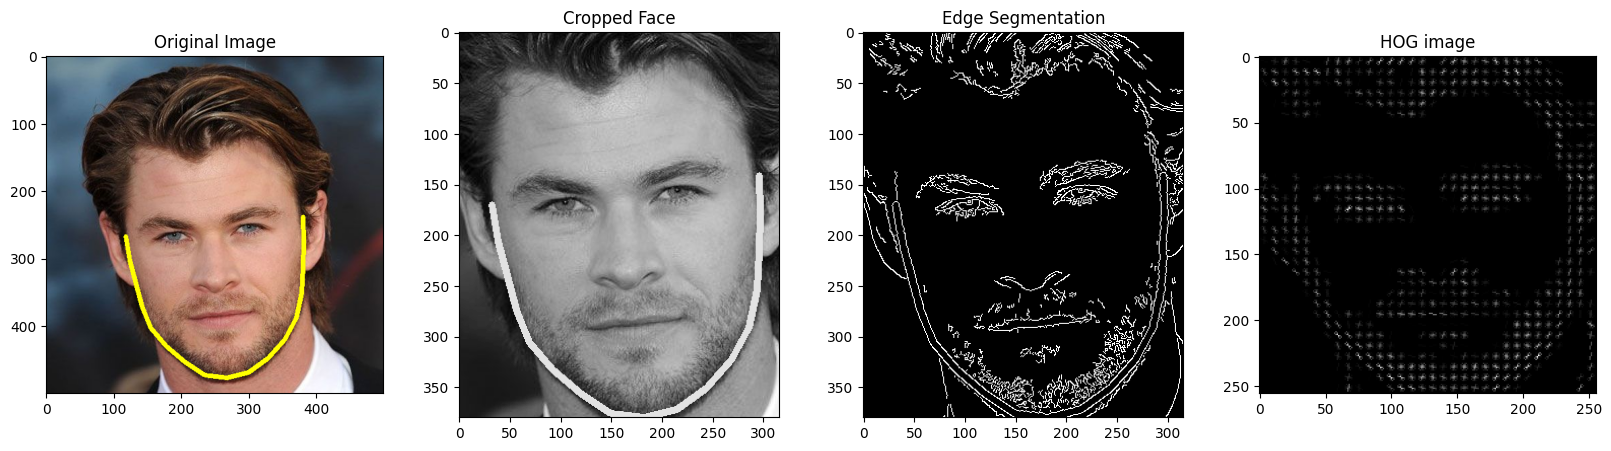

In [1]:
import cv2
import numpy as np
import dlib
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load dlib's pre-trained face detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("./model/shape_predictor_68_face_landmarks.dat")

def apply_kmeans(image, n_clusters=4):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)

    # Perform K-means clustering to find the most dominant colors
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(pixels)

    # Replace each pixel with its nearest centroid
    segmented_image = kmeans.cluster_centers_[kmeans.labels_]
    segmented_image = segmented_image.reshape(image.shape).astype('uint8')

    return segmented_image
# Convert to grayscale and crop the face region
def cropped_image(image, face, bot):
    # Increase the bounding box size
    left = max(0, int(face.left()*0.8))
    top = max(0, int(face.top()*0.5))
    right = min(image.shape[1], int(face.right()*1.1))
    bottom = min(bot.y, int(face.bottom()*1.5))
    
    # Crop the face
    cropped = image[top:bottom, left:right]
    return cropped

# Edge segmentation using Canny edge detection
def edge_segmentation(image):
    edges = cv2.Canny(image, 100, 200)
    return edges

# Feature extraction (dummy example)


def extract_features(image):
    # Resize the image to 128x128
    image_resized = cv2.resize(image, (256, 256))
    # Compute HOG descriptors
    features, hog_image = hog(image_resized, orientations=8, pixels_per_cell=(8, 8),
                              cells_per_block=(4, 4), block_norm="L2", visualize=True)
    return features, hog_image

# Main process
def main(image_path): 
    # Load image
    image = cv2.imread(image_path)
    print(image.shape)
    # Step 1: Detect faces using dlib
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray_image)
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    for face in faces:
        # Step 2: Convert to grayscale and crop the face
        landmarks = predictor(gray_image, face)
        for i in range(1, 17):
            cv2.line(image, (landmarks.part(i).x, landmarks.part(i).y), (landmarks.part(i-1).x, landmarks.part(i-1).y), (0, 255, 255), min(image.shape[0], image.shape[1])//100)
    


        cropped = cropped_image(image, face, landmarks.part(8))

        gray_face = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
        # gray_face = apply_kmeans(cropped)
        # Step 3: Edge segmentation and feature extraction
        edges = edge_segmentation(gray_face)
        features, hog_image = extract_features(edges)
        
          # Rescale histogram for better display
        # Display results
        ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax[0].set_title('Original Image')
        ax[1].imshow(gray_face, cmap='gray')
        ax[1].set_title('Cropped Face')
        ax[2].imshow(edges, cmap='gray')
        ax[2].set_title('Edge Segmentation')
        ax[3].imshow(hog_image, cmap='gray')
        ax[3].set_title("HOG image")

# Run the main process
image_path = './test/test6.jpg'
main(image_path)
